In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [3]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset). transform(dataset)  #apply one hot encoding on our dataset
df = pd.DataFrame(te_ary, columns = te.columns_) #Creating a new dataframe 
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


<AxesSubplot:xlabel='Sunglasses', ylabel='count'>

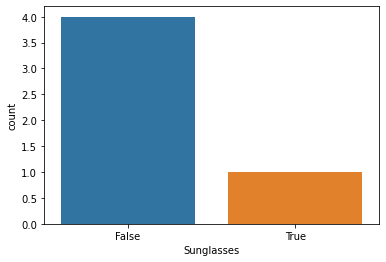

In [4]:
sns.countplot(df['Sunglasses']) 

Not so many purchase on Sunglasses

<AxesSubplot:xlabel='Sneakers', ylabel='count'>

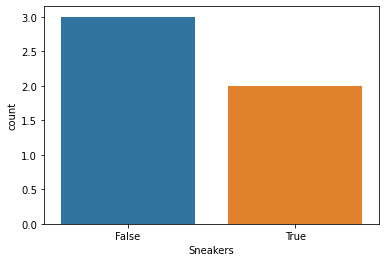

In [5]:
sns.countplot(df['Sneakers'])

no purchase of sneakers is higher than the purchase of sneakers

<AxesSubplot:xlabel='Shirt', ylabel='count'>

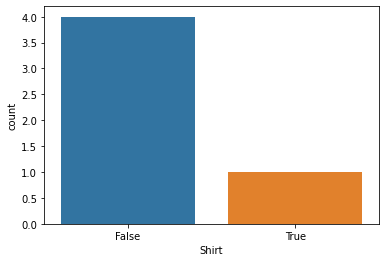

In [6]:
sns.countplot(df['Shirt'])

no purchase of shirt is higher than purchase of shirt

<AxesSubplot:xlabel='Scarf', ylabel='count'>

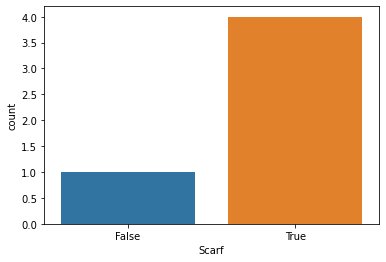

In [7]:
sns.countplot(df['Scarf'])

purchase of scarf is 
higher than no purchase of scarf

<AxesSubplot:xlabel='Sandals', ylabel='count'>

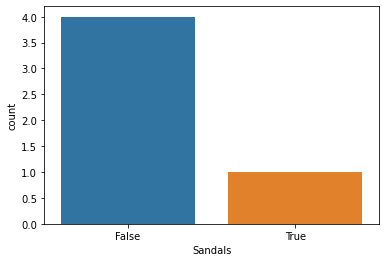

In [8]:
sns.countplot(df['Sandals'])

no purchase of sandals is way higher than the purchase of sandals

<AxesSubplot:xlabel='Pants', ylabel='count'>

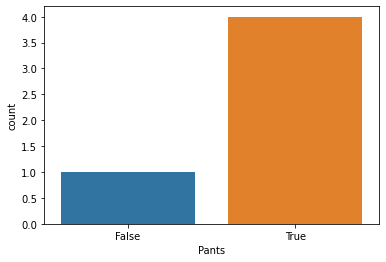

In [9]:
sns.countplot(df['Pants'])

There is more purchase of pants 

<AxesSubplot:xlabel='Necklace', ylabel='count'>

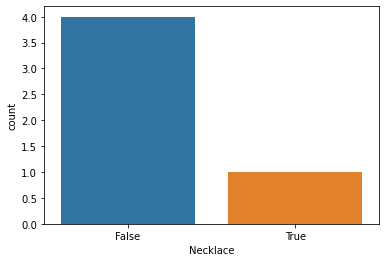

In [10]:
sns.countplot(df['Necklace'])

really little purchase of necklace

<AxesSubplot:xlabel='Heels', ylabel='count'>

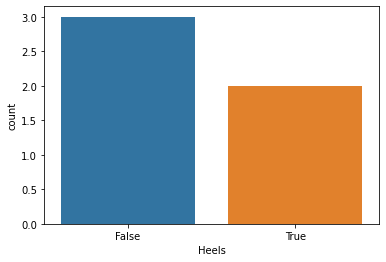

In [11]:
sns.countplot(df['Heels'])

no purchase of heels is higher than the purchase of heels

<AxesSubplot:xlabel='Hat', ylabel='count'>

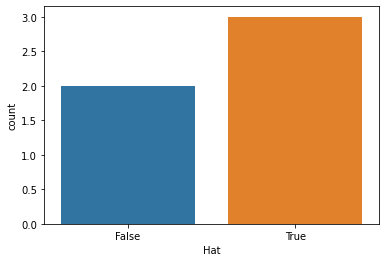

In [12]:
sns.countplot(df['Hat'])

There is a high purchase of hat

<AxesSubplot:xlabel='Earrings', ylabel='count'>

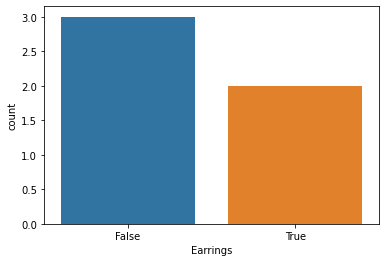

In [13]:
sns.countplot(df['Earrings'])

no purchase of earrings is higher 

<AxesSubplot:xlabel='Dress', ylabel='count'>

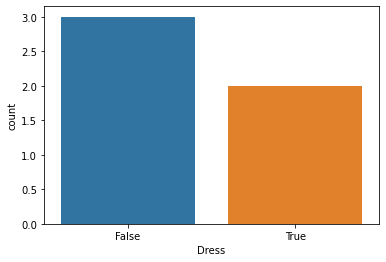

In [14]:
sns.countplot(df['Dress'])

There is less purchase of dress purchase of dress

<AxesSubplot:xlabel='Skirt', ylabel='count'>

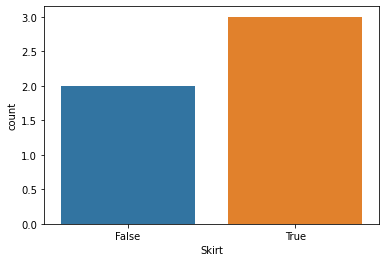

In [15]:
sns.countplot(df['Skirt'])

There is more purchase on skirt 

In [16]:
#support
from mlxtend.frequent_patterns import apriori
apriori(df, min_support = 0.6, use_colnames = True)

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [17]:
apriori(df, min_support = 0.6, use_colnames = True)

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


The most frequent itemsets are pants, scarf, skirt

In [19]:
from mlxtend.frequent_patterns import apriori
frequent_itemset = apriori(df, min_support = 0.5, use_colnames = True)

In [20]:
#confidence

from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'confidence', min_threshold = 0.1) #asssociate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


more customers purchase Skirts are more likely to purchase Pants 

In [21]:
 #lift
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'lift', min_threshold = 1.25) #asssociate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


customers are more likely to buy skirts and pants

## Dataset2

In [22]:
import csv
csv_filename = 'Market_Basket_Optimisation.csv'
with open(csv_filename) as f:
    reader = csv.reader(f)
    data = list(reader)

In [23]:
te=TransactionEncoder()
te_ary=te.fit(data).transform(data)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df.describe()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
count,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,...,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,7500,7348,7434,7466,7251,7467,7436,7420,7394,7432,...,7032,7308,7498,7377,7431,7280,7062,7415,7296,7430


In [25]:
df.shape

(7501, 120)

In [26]:
#support
from mlxtend.frequent_patterns import apriori


In [27]:
apriori(df, min_support = 0.05, use_colnames =True )

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [31]:
from mlxtend.frequent_patterns import apriori
frequent_itemset = apriori(df, min_support = 0.05, use_colnames = True)
frequent_itemset

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


The most frequent itemset milk, spaghetti, greentea, chocolate, eggs, frenchfries, milk, mineral water

In [36]:
#confidence

from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'confidence', min_threshold = 0.1) #asssociate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


Given the low confidence threshold and rating, the probality of customers buying an itemset is very low.

In [33]:
#lift
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'lift', min_threshold = 1.25) #asssociate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


In this report, there is a high probality that customers prefer to buy "mineral water" , "spaghetti" and "chocolate" together.